In [1]:
#importing required libraries
import pandas as pd

import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.svm import SVC 

from matplotlib.pyplot import figure

In [2]:
#Loading desired file into a dataframe
df1 = pd.read_csv("Data/bank/bank-full.csv", sep=';')
df = df1[:8000]


#df = pd.read_csv("Data/bank/bank.csv", sep=';')

#Look at the shape to see rows and columns
df.shape

(8000, 17)

In [3]:
#To visualize the numerical columns for potentional issues for cleaning
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.0,8000.0
mean,39.452125,1010.212625,17.634125,264.975250,2.542000,-1.0,0.0
std,9.254670,2466.448855,8.230977,249.763865,2.854296,0.0,0.0
min,20.000000,-3372.000000,2.000000,0.000000,1.000000,-1.0,0.0
25%,32.000000,40.000000,9.000000,118.000000,1.000000,-1.0,0.0
50%,38.000000,323.000000,16.000000,193.000000,2.000000,-1.0,0.0
75%,46.000000,1025.000000,26.000000,322.000000,3.000000,-1.0,0.0
max,61.000000,58544.000000,30.000000,3366.000000,63.000000,-1.0,0.0


In [4]:
#Confirming if any of the columns have nulls
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
#Checking the columns for categorical values that may need to be converted to int
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
#creating a list of column names that are categorical to be changed to int
cols_encode = [
               'job', 
               'marital',
               'education',
               'default',
               'housing',
               'loan',
               'contact',
               'month',
               'poutcome'
              ]

#Creating a list of int columns for later standardization
cols_int = ['age','balance','day','duration','campaign','pdays','previous']

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.0,8000.0
mean,39.452125,1010.212625,17.634125,264.975250,2.542000,-1.0,0.0
std,9.254670,2466.448855,8.230977,249.763865,2.854296,0.0,0.0
min,20.000000,-3372.000000,2.000000,0.000000,1.000000,-1.0,0.0
25%,32.000000,40.000000,9.000000,118.000000,1.000000,-1.0,0.0
50%,38.000000,323.000000,16.000000,193.000000,2.000000,-1.0,0.0
75%,46.000000,1025.000000,26.000000,322.000000,3.000000,-1.0,0.0
max,61.000000,58544.000000,30.000000,3366.000000,63.000000,-1.0,0.0


In [8]:
#printing unique values of categorical variables as a check
for col in cols_encode:
    print(col)
    print(df[col].unique())
    print(" ")

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
 
marital
['married' 'single' 'divorced']
 
education
['tertiary' 'secondary' 'unknown' 'primary']
 
default
['no' 'yes']
 
housing
['yes' 'no']
 
loan
['no' 'yes']
 
contact
['unknown']
 
month
['may' 'jun']
 
poutcome
['unknown']
 


In [9]:
df['y'] = df['y'].replace(['no'], 0)
df['y'] = df['y'].replace(['yes'], 1)

print(df['y'].unique())

[0 1]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
#Loop created to convert catagorical columns to int values via a target encoding
for c in cols_encode:
    
    i = 0
        
    unique_val = df[c].unique()
    
    mean_val = df.groupby(c)['y'].mean()
    
    for u in unique_val:
        df[c] = df[c].replace([u], mean_val[u])
        


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [11]:
#printing previoius categorical values to confirm change
for col in cols_encode:
    print(col)
    print(df[col].unique())
    print(" ")

job
[0.03083333 0.03733122 0.02953586 0.03283019 0.04545455 0.03571429
 0.03153611 0.02651934 0.03626943 0.03614458 0.01315789 0.02352941]
 
marital
[0.02466598 0.04086318 0.05120167]
 
education
[0.03450479 0.03206934 0.02393617 0.03254848]
 
default
[0.03243105 0.02380952]
 
housing
[0.03357847 0.02017654]
 
loan
[0.03333823 0.02602855]
 
contact
[0.03225]
 
month
[0.03242428 0.        ]
 
poutcome
[0.03225]
 


In [12]:
#Checking the columns for categorical values that may need to be converted to int
df.dtypes

age            int64
job          float64
marital      float64
education    float64
default      float64
balance        int64
housing      float64
loan         float64
contact      float64
day            int64
month        float64
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome     float64
y              int64
dtype: object

In [13]:
#Creating dataframe for training without the answer column
X = df.drop(['y'], axis = 1)
print(X.shape)
X

(8000, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,0.030833,0.024666,0.034505,0.032431,2143,0.033578,0.033338,0.03225,5,0.032424,261,1,-1,0,0.03225
1,44,0.037331,0.040863,0.032069,0.032431,29,0.033578,0.033338,0.03225,5,0.032424,151,1,-1,0,0.03225
2,33,0.029536,0.024666,0.032069,0.032431,2,0.033578,0.026029,0.03225,5,0.032424,76,1,-1,0,0.03225
3,47,0.032830,0.024666,0.023936,0.032431,1506,0.033578,0.033338,0.03225,5,0.032424,92,1,-1,0,0.03225
4,33,0.045455,0.040863,0.023936,0.032431,1,0.020177,0.033338,0.03225,5,0.032424,198,1,-1,0,0.03225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,39,0.037331,0.024666,0.032069,0.032431,1965,0.033578,0.033338,0.03225,2,0.000000,65,1,-1,0,0.03225
7996,29,0.029536,0.024666,0.032069,0.032431,291,0.033578,0.033338,0.03225,2,0.000000,205,3,-1,0,0.03225
7997,46,0.032830,0.024666,0.032548,0.032431,938,0.033578,0.033338,0.03225,2,0.000000,92,2,-1,0,0.03225
7998,39,0.030833,0.024666,0.034505,0.032431,756,0.033578,0.033338,0.03225,2,0.000000,268,1,-1,0,0.03225


In [14]:
#Creating a series with the answers that will be used for training.
y = df['y']
y

0       0
1       0
2       0
3       0
4       0
       ..
7995    0
7996    0
7997    0
7998    0
7999    0
Name: y, Length: 8000, dtype: int64

In [15]:
#Splitting the data elements from X and y into a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

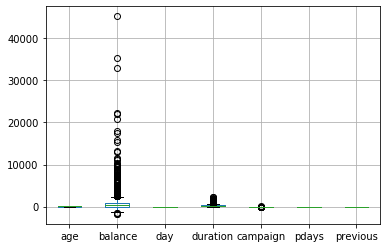

In [16]:
#Boxplots before standardization
boxplot = X_test.boxplot(column = cols_int)

In [17]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# apply standardization on numerical features
for i in cols_int:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

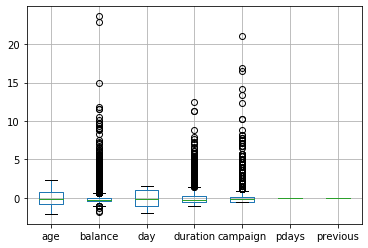

In [18]:
#Boxplots after standardization
boxplot = X_train_stand.boxplot(column = cols_int)

In [19]:
#Below steps are used to train and test the model before Standardization
model = DecisionTreeClassifier()

model.fit(X_train,y_train)

y_predict = model.predict(X_test)


In [20]:
#accuracy_score will return a value between 0 and 1, 1 being 100%
score = accuracy_score(y_test, y_predict)
print(score)
#The rows are the actual and the columns are the predicted
pd.crosstab(y_test, y_predict)

0.951875


col_0,0,1
y,,
0,1503,47
1,30,20


In [21]:
#Printing report to look at the accuracy based on y_test
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1550
           1       0.30      0.40      0.34        50

    accuracy                           0.95      1600
   macro avg       0.64      0.68      0.66      1600
weighted avg       0.96      0.95      0.96      1600



In [22]:
#Below steps are used to train and test the model after standardization
model = DecisionTreeClassifier()

model.fit(X_train_stand,y_train)

y_predict = model.predict(X_test_stand)


In [23]:
#accuracy_score will return a value between 0 and 1, 1 being 100%
score = accuracy_score(y_test, y_predict)
print(score)

#The rows are the actual and the columns are the predicted
pd.crosstab(y_test, y_predict)

0.95125


col_0,0,1
y,,
0,1501,49
1,29,21


For an explanation of the classificatoin report see https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397

In [24]:
#Printing report to look at the accuracy based on y_test
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1550
           1       0.30      0.42      0.35        50

    accuracy                           0.95      1600
   macro avg       0.64      0.69      0.66      1600
weighted avg       0.96      0.95      0.96      1600



In [25]:
#Applying SMOTE to oversample the minority imbalance
from imblearn.over_sampling import SMOTE 
sm = SMOTE() 
X_train_smote, y_train_smote = sm.fit_sample(X_train_stand, y_train) 

In [26]:
#Show the counts of the minority imbalance before and after SMOTE
from collections import Counter
print("Before SMOTE: ", Counter(y_train))
print("After SMOTE: ", Counter(y_train_smote))

Before SMOTE:  Counter({0: 6192, 1: 208})
After SMOTE:  Counter({0: 6192, 1: 6192})


In [27]:
#Traing the model after SMOTE
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test_stand)

#accuracy_score will return a value between 0 and 1, 1 being 100%
score = accuracy_score(y_test, y_predict)

print(score)

#The rows are the actual and the columns are the predicted
pd.crosstab(y_test, y_predict)

0.95375


col_0,0,1
y,,
0,1499,51
1,23,27


In [28]:
#Printing report to look at the accuracy based on y_test
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1550
           1       0.35      0.54      0.42        50

    accuracy                           0.95      1600
   macro avg       0.67      0.75      0.70      1600
weighted avg       0.96      0.95      0.96      1600



Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

In [29]:
#pip install xgboost

In [30]:
from xgboost import XGBClassifier

#Running the second model as per the requirements and to also partake in hyperparameter testing
model = XGBClassifier()
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test_stand)

#accuracy_score will return a value between 0 and 1, 1 being 100%
score = accuracy_score(y_test, y_predict)
print('Test Accuracy: ', score)

#The rows are the actual and the columns are the predicted
pd.crosstab(y_test, y_predict)

Test Accuracy:  0.97125


col_0,0,1
y,,
0,1529,21
1,25,25


In [31]:
#Printing report to look at the accuracy based on y_test
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1550
           1       0.54      0.50      0.52        50

    accuracy                           0.97      1600
   macro avg       0.76      0.74      0.75      1600
weighted avg       0.97      0.97      0.97      1600



In [32]:
#Create lists that can be used in the below for loops to test hyperparameters
maxD = [8, 9, 10, 11, 12]
subS = [0.25, 0.5, 0.75, 1]
nEst = [100, 200, 300, 400, 500]
learnR = [0.05, 0.1, 0.2, 0.3]
randS = [1, 2, 3 ,4]

#Create an empty dataset for holding loop results 
resultSet = pd.DataFrame()

#Series of for loops for testing hyperparameters
for m in maxD:
    for s in subS:
        #for n in nEst:
            #for l in learnR:
                #for r in randS:
                    model = XGBClassifier(max_depth = m,
                                          subsample = s,
                                          n_estimators = 300,
                                          learning_rate = 0.1,
                                          random_state = 3)

                    model.fit(X_train_smote,y_train_smote)
                    y_predict = model.predict(X_test_stand)
                    y_train_predict = model.predict(X_train_stand)

                    #Can only append if ingore_index is True
                    #Loading results in empty dataframe created previous
                    resultSet = resultSet.append({'1 max_depth': m, 
                                                  '2 subsample': s, 
                                                  '3 n_estimators': 300, #replace with n
                                                  '4 Learning_rate': 0.1, #replace with l
                                                  '5 random_state': 3, #replace with r
                                                  'Train Accuracy': accuracy_score(y_train, y_train_predict),
                                                  'Test Accuracy': accuracy_score(y_test, y_predict)},
                                                  ignore_index = True)


In [33]:
#Loading the max value for test accuracy in a variable from resultSet dataset created in the loop
max_test = resultSet['Test Accuracy'].max()

#Extracting the records with the max test accuracy to see the parameter settings to use
rs_check = resultSet.loc[resultSet['Test Accuracy'] == max_test]
rs_check

,1 max_depth,2 subsample,3 n_estimators,4 Learning_rate,5 random_state,Test Accuracy,Train Accuracy
13,11.0,0.5,300.0,0.1,3.0,0.974375,1.0


In [ ]:
#Running the second model as per the requirements after hyperparameter testing
model = XGBClassifier(max_depth = 8,
                      subsample = 0.5,
                      n_estimators = 300,
                      learning_rate = 0.1,
                      random_state = 3)
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test_stand)
#accuracy_score will return a value between 0 and 1, 1 being 100%
score = accuracy_score(y_test, y_predict)
print('Test Accuracy: ', score)
#The rows are the actual and the columns are the predicted
pd.crosstab(y_test, y_predict)

Test Accuracy:  0.966875


col_0,0,1
y,,
0,1525,25
1,28,22
